## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [ ]:
x=np.linspace(0,20,50)
print(len(x))

50


In [ ]:
a=-2
b=1
y=a*x+b
print(y)

[  1.           0.18367347  -0.63265306  -1.44897959  -2.26530612
  -3.08163265  -3.89795918  -4.71428571  -5.53061224  -6.34693878
  -7.16326531  -7.97959184  -8.79591837  -9.6122449  -10.42857143
 -11.24489796 -12.06122449 -12.87755102 -13.69387755 -14.51020408
 -15.32653061 -16.14285714 -16.95918367 -17.7755102  -18.59183673
 -19.40816327 -20.2244898  -21.04081633 -21.85714286 -22.67346939
 -23.48979592 -24.30612245 -25.12244898 -25.93877551 -26.75510204
 -27.57142857 -28.3877551  -29.20408163 -30.02040816 -30.83673469
 -31.65306122 -32.46938776 -33.28571429 -34.10204082 -34.91836735
 -35.73469388 -36.55102041 -37.36734694 -38.18367347 -39.        ]


#### Plot your data points. 

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

![image.png](attachment:image.png)

In [ ]:
def h(x,th0,th1):
  return th0+th1*x

def cost(x,y,th0,th1):
  hypo = h(x,th0,th1)
  m = len(hypo)
  return sum((hypo-y)**2)/(2*m)

def lin_reg(x,y,theta0,theta1,lr,max_iteration):   
    theta0=0
    theta1=0
    j2 = cost(x,y,theta0,theta1)
    j1=10**10                       
    n=0
    m=len(x)                        
    v0t=0
    v1t=0
    n=0
    epsilon=10**(-15)
    it=[]
    jlist=[]
    th0list=[]
    th1list=[]
    while abs(j2-j1)>=0.000001 and n< max_iteration:
        
        v0t=v0t+(sum(h(x,theta0,theta1)-y)/(m))**2
        v1t=v1t+(sum((h(x,theta0,theta1)-y)*x)/(m))**2
        G0=v0t**0.5+epsilon
        G1=v1t**0.5+epsilon
        theta0=theta0 - (lr/G0)*cost(x,y,theta0, theta1)
        theta1=theta1 - (lr/G1)*cost(x,y,theta0, theta1)
        th0list.append(theta0)
        th1list.append(theta1)
        it.append(n)
        j1=j2
        j2= cost(x,y,theta0,theta1)
        jlist.append(j2)
        n+=1
        
    print(n)
    return it,jlist,th0list,th1list,theta0,theta1

In [ ]:
it,jlist,th0list,th1list,th0,th1=lin_reg(x, y, 0, 0,0.1, 100)
print("R2 score is",r2_score(y,h(x,th0,th1)))

100
R2 score is 0.6229081720036747


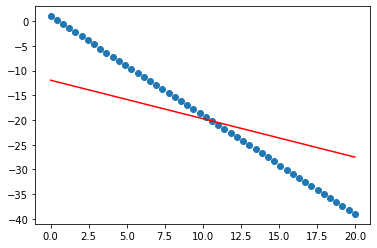

In [ ]:
plt.scatter(x,y)
plt.plot(x,h(x,th0,th1) , c = "r")
plt.show()

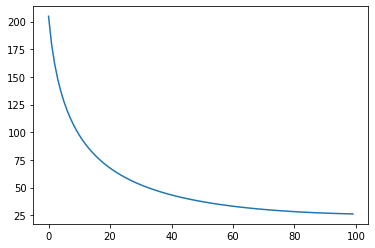

In [ ]:
plt.plot(jlist);

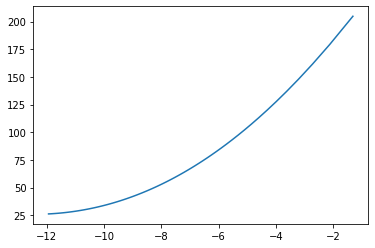

In [ ]:
plt.plot(th0list,jlist);

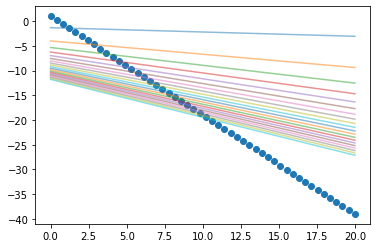

In [ ]:
plt.scatter(x,y)
for i in range(0,len(th0list),5 ):
    plt.plot(x,h(x,th0list[i],th1list[i]) ,alpha=0.5)

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

![image.png](attachment:image.png)

In [ ]:
def h(x,th0,th1):
  return th0+th1*x

def cost(x,y,th0,th1):
  hypo = h(x,th0,th1)
  m = len(hypo)
  return sum((hypo-y)**2)/(2*m)


def lin_reg(x,y,theta0,theta1,lr,beta,iteraions):

    j1=10**10
    j2=10**9
    n=0
    m = len(x)
    v0t=0
    v1t=0
    epsilon=10**(-8)
    jlist=[]
    th0list=[]
    th1list= []
    while abs(j2-j1)>0.0001 and n< iteraions:
      for i in range(m):
        v0t=beta*v0t+(1-beta)*(sum(h(x,theta0,theta1)-y)/(m))**2
        v1t=beta*v1t+(1-beta)*(sum((h(x,theta0,theta1)-y)*x)/(m))**2
        
        G0=v0t**0.5+epsilon
        G1=v1t**0.5+epsilon
        theta0=theta0 - (lr/G0)*cost(x,y,theta0,theta1)
        theta1=theta1 - (lr/G1)*cost(x,y,theta0,theta1)
        th0list.append(theta0)
        th1list.append(theta1)
      j1=j2
      j2=cost(x,y,theta0,theta1)
      jlist.append(j2)
      n+=1
    return it,jlist,th0list,th1list,theta0,theta1

In [ ]:
it,jlist,th0list,th1list,th0,th1=lin_reg(x, y, 0,0, 0.000019,0.99,100)
print("R2 score is",r2_score(y,h(x,th0,th1)))

R2 score is -1.9653298495277203


## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

![image-4.png](attachment:image-4.png)

## Congratulations 
![image.png](attachment:image.png)